In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.datasets import mnist
import numpy as np
import cv2
import matplotlib.pyplot as plt 

In [49]:
# loading datasets 

(x_train,y_train),(x_test,y_test) = mnist.load_data()

shape = x_train.shape[1]*x_train.shape[2]
shape

784

In [11]:
# flatten the images 
x_train = x_train.reshape(-1,shape).astype("float32")/255.0
x_test = x_test.reshape(-1,shape).astype("float32")/255.0

In [14]:
'''
creating model using sequential API 
not flexible allows only ; one input mapped to one output
'''

model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape=shape),
        layers.Dense(512,activation="relu",name="first_layer"),
        layers.Dense(256,activation="relu",name="second_layer"),
        layers.Dense(10,name="third_layer")
        
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_layer (Dense)          (None, 512)               401920    
_________________________________________________________________
second_layer (Dense)         (None, 256)               131328    
_________________________________________________________________
third_layer (Dense)          (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [16]:
# compile model
model.compile(
    
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),#keras.optimizers.experimental.SGD
    
    metrics = ["accuracy"]
)


In [19]:
# train the model 

model.fit(x_train,y_train,batch_size=20,epochs=5,verbose=2)

Epoch 1/5
3000/3000 - 22s - loss: 0.0406 - accuracy: 0.9869
Epoch 2/5
3000/3000 - 19s - loss: 0.0326 - accuracy: 0.9895
Epoch 3/5
3000/3000 - 19s - loss: 0.0255 - accuracy: 0.9919
Epoch 4/5
3000/3000 - 17s - loss: 0.0257 - accuracy: 0.9924
Epoch 5/5
3000/3000 - 18s - loss: 0.0226 - accuracy: 0.9935


In [20]:
# evaluate model 

model.evaluate(x_test,y_test,batch_size=32,verbose=2)

313/313 - 1s - loss: 0.0847 - accuracy: 0.9828


[0.08470854163169861, 0.9828000068664551]

In [24]:
'''
 using functional API; more flexible 
'''

inputs = keras.Input(shape=shape) 
layer = layers.Dense(512,activation="relu",name="first_layer")(inputs)
layer = layers.Dense(256,activation="relu",name="second_layer")(layer)
outputs = layers.Dense(10,activation="softmax",name="output_layer")(layer)
model_2 = keras.Model(inputs=inputs,outputs=outputs)

model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
first_layer (Dense)          (None, 512)               401920    
_________________________________________________________________
second_layer (Dense)         (None, 256)               131328    
_________________________________________________________________
output_layer (Dense)         (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_2.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),#from_logits=False
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    metrics=["accuracy"]
    
    
)

In [34]:
model_2.fit(x_train,y_train,batch_size=16,epochs=5,verbose=2)

Epoch 1/5
3750/3750 - 22s - loss: 0.0115 - accuracy: 0.9963
Epoch 2/5
3750/3750 - 20s - loss: 0.0045 - accuracy: 0.9988
Epoch 3/5
3750/3750 - 20s - loss: 0.0026 - accuracy: 0.9993
Epoch 4/5
3750/3750 - 20s - loss: 0.0014 - accuracy: 0.9997
Epoch 5/5
3750/3750 - 21s - loss: 7.3521e-04 - accuracy: 0.9998


In [35]:
model_2.evaluate(x_test,y_test,batch_size=16,verbose=2)

625/625 - 1s - loss: 0.0862 - accuracy: 0.9859


[0.08617285639047623, 0.9858999848365784]

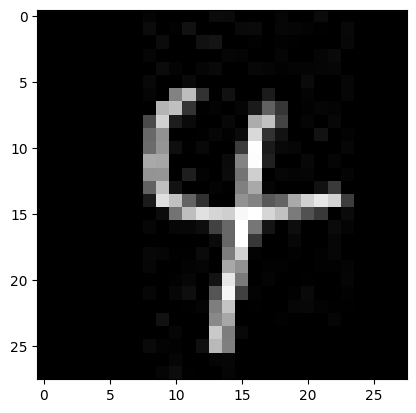

In [87]:
# predict new data

image = cv2.imread("four.jpg")

plt.imshow(image)

plt.show()


In [90]:
image_ = np.array([image])

image_ = image_.reshape(-1,shape).astype("float32")/255.0

prediction = model_2.predict(image_)

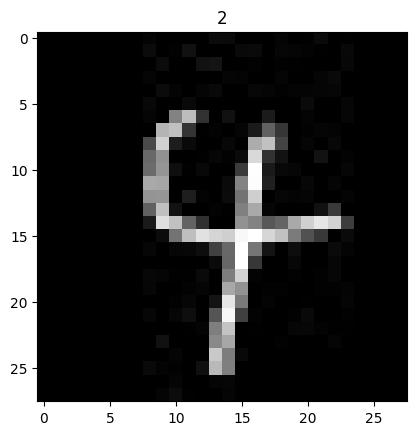

In [91]:
plt.imshow(image)
plt.title(np.argmax(prediction))
plt.show()